### Data Generator

In [84]:
import json as json
import random as random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#### Source
1. https://developers.google.com/public-data/docs/canonical/countries_csv
2. http://www.coretreks.com/nepal-map-with-districts-nepal-map-with-14-zones-and-75-districts.html

#### Countries

In [85]:
Countries = []
with open('countries.txt','r') as f:
    for line in f:
        #print(line.split())
        lt = line.split()
        symbol = lt[0]
        lat = lt[1]
        lon = lt[2]
        nm = lt[3:]
        name =""
        for item in nm:
            name = name + "-" + item
        name = name[1:]   
        #print(name)
        
        Countries.append({"sym" : symbol,\
                          "name" : name,\
                          "lat" : lat,\
                          "lon": lon,\
                          })

In [86]:
with open("countries.json", 'w') as fw:
    json.dump(Countries,fw)

-----

### IDS

In [87]:
def randomID_generator(N):
    letters = ["A", "B", "C", "D","E",\
               "F", "G", "H", "I", "J",\
               "K", "L", "M", "N", "O",\
               "P", "Q", "R", "S", "T",\
               "U", "V", "W", "X", "Y", "Z"]
    numbers = [str(i) for i in range(9)]
    ID = ""
    for k in range(N):
        t = random.choice([0,1])
        if t == 0:
            ID = ID + random.choice(letters)
        else:
            ID = ID + random.choice(numbers)
    return ID

In [88]:
randomID(10)

'1JOKS6RMCC'

In [89]:
def profession_generator():
    Prof = {'Teaching':['English','Physics','Math'],\
             'IT': ['Software','Cloud Computing','Full Stack'],\
             'Doctor' : ['Vetenary','Cancer'],\
             'Agriculture' : ['Sugarcane','Vegetable','Goat Farm'],\
             'Business' : ['Food Industry','Stationary'],\
             'Research' : ['Math','Physics','Chemistry']}
    p = random.choice(list(Prof.keys()))
    sp = random.choice(Prof[p])
    return [p,sp]

In [90]:
profession_generator()

['Doctor', 'Cancer']

In [91]:
def age_generator():
    return random.randint(25,50)

In [92]:
age_generator()

29

In [93]:
def district_generator():
    alldist = ["Bhojpur","Dhankuta","Morang", "Sankhuwasabha", "Sunsari", "Terathum",\
                    "Gorkha", "Kaski", "Lamjung", "Manang", "Syangja", "Tanahu"]
    one = random.choice(alldist)
    return one

In [94]:
district_generator()

'Gorkha'

-------

In [98]:
def generator(Countries):
    person = {}
    ID = randomID_generator(10)
    country = random.choice(Countries)
    age = age_generator()
    district = district_generator()
    prof = profession_generator()
    person.update({'ID': ID,\
                'Country': country['name'],\
                'lat' : country['lat'],\
                'lon' : country['lon'],\
                'Age': age,\
                'District': district,\
                'Profession': prof})
        
    return person
    

In [99]:
Data = []
for k in range(100):
    data = generator(Countries)
    #print(data)
    Data.append(data)


In [101]:
DF = pd.DataFrame(Data)
DF

,Age,Country,District,ID,Profession,lat,lon
0,41,Australia,Sankhuwasabha,8RAU4USW0C,"[Business, Stationary]",-25.274398,133.775136
1,32,Nepal,Gorkha,806O81X4W4,"[Research, Chemistry]",28.394857,84.124008
2,26,Tokelau,Bhojpur,4EECUY4N42,"[Teaching, Math]",-8.967363,-171.855881
3,35,Liechtenstein,Tanahu,QC15TAMS0I,"[Agriculture, Goat Farm]",47.166,9.555373
4,36,Macedonia-[FYROM],Lamjung,05LZ00K888,"[Doctor, Cancer]",41.608635,21.745275
5,25,Anguilla,Kaski,ABNDT4L220,"[Doctor, Vetenary]",18.220554,-63.068615
6,35,U.S.-Virgin-Islands,Lamjung,Z3SV3G2CFN,"[Business, Stationary]",18.335765,-64.896335
7,47,Guyana,Bhojpur,42Q43Z5S82,"[Teaching, English]",4.860416,-58.93018
8,30,Sweden,Tanahu,P053686HLQ,"[Research, Physics]",60.128161,18.643501
9,28,Cook-Islands,Kaski,OJI3P5D0FA,"[Agriculture, Vegetable]",-21.236736,-159.777671


In [113]:
DF.groupby('Country').count()['ID']


Country
Albania                                         1
Angola                                          1
Anguilla                                        2
Antigua-and-Barbuda                             1
Australia                                       1
Barbados                                        1
Belgium                                         1
Bosnia-and-Herzegovina                          1
Brazil                                          1
British-Indian-Ocean-Territory                  1
British-Virgin-Islands                          1
Bulgaria                                        1
Canada                                          2
Cayman-Islands                                  1
Central-African-Republic                        1
Chad                                            1
Chile                                           1
Colombia                                        1
Congo-[DRC]                                     1
Cook-Islands                              

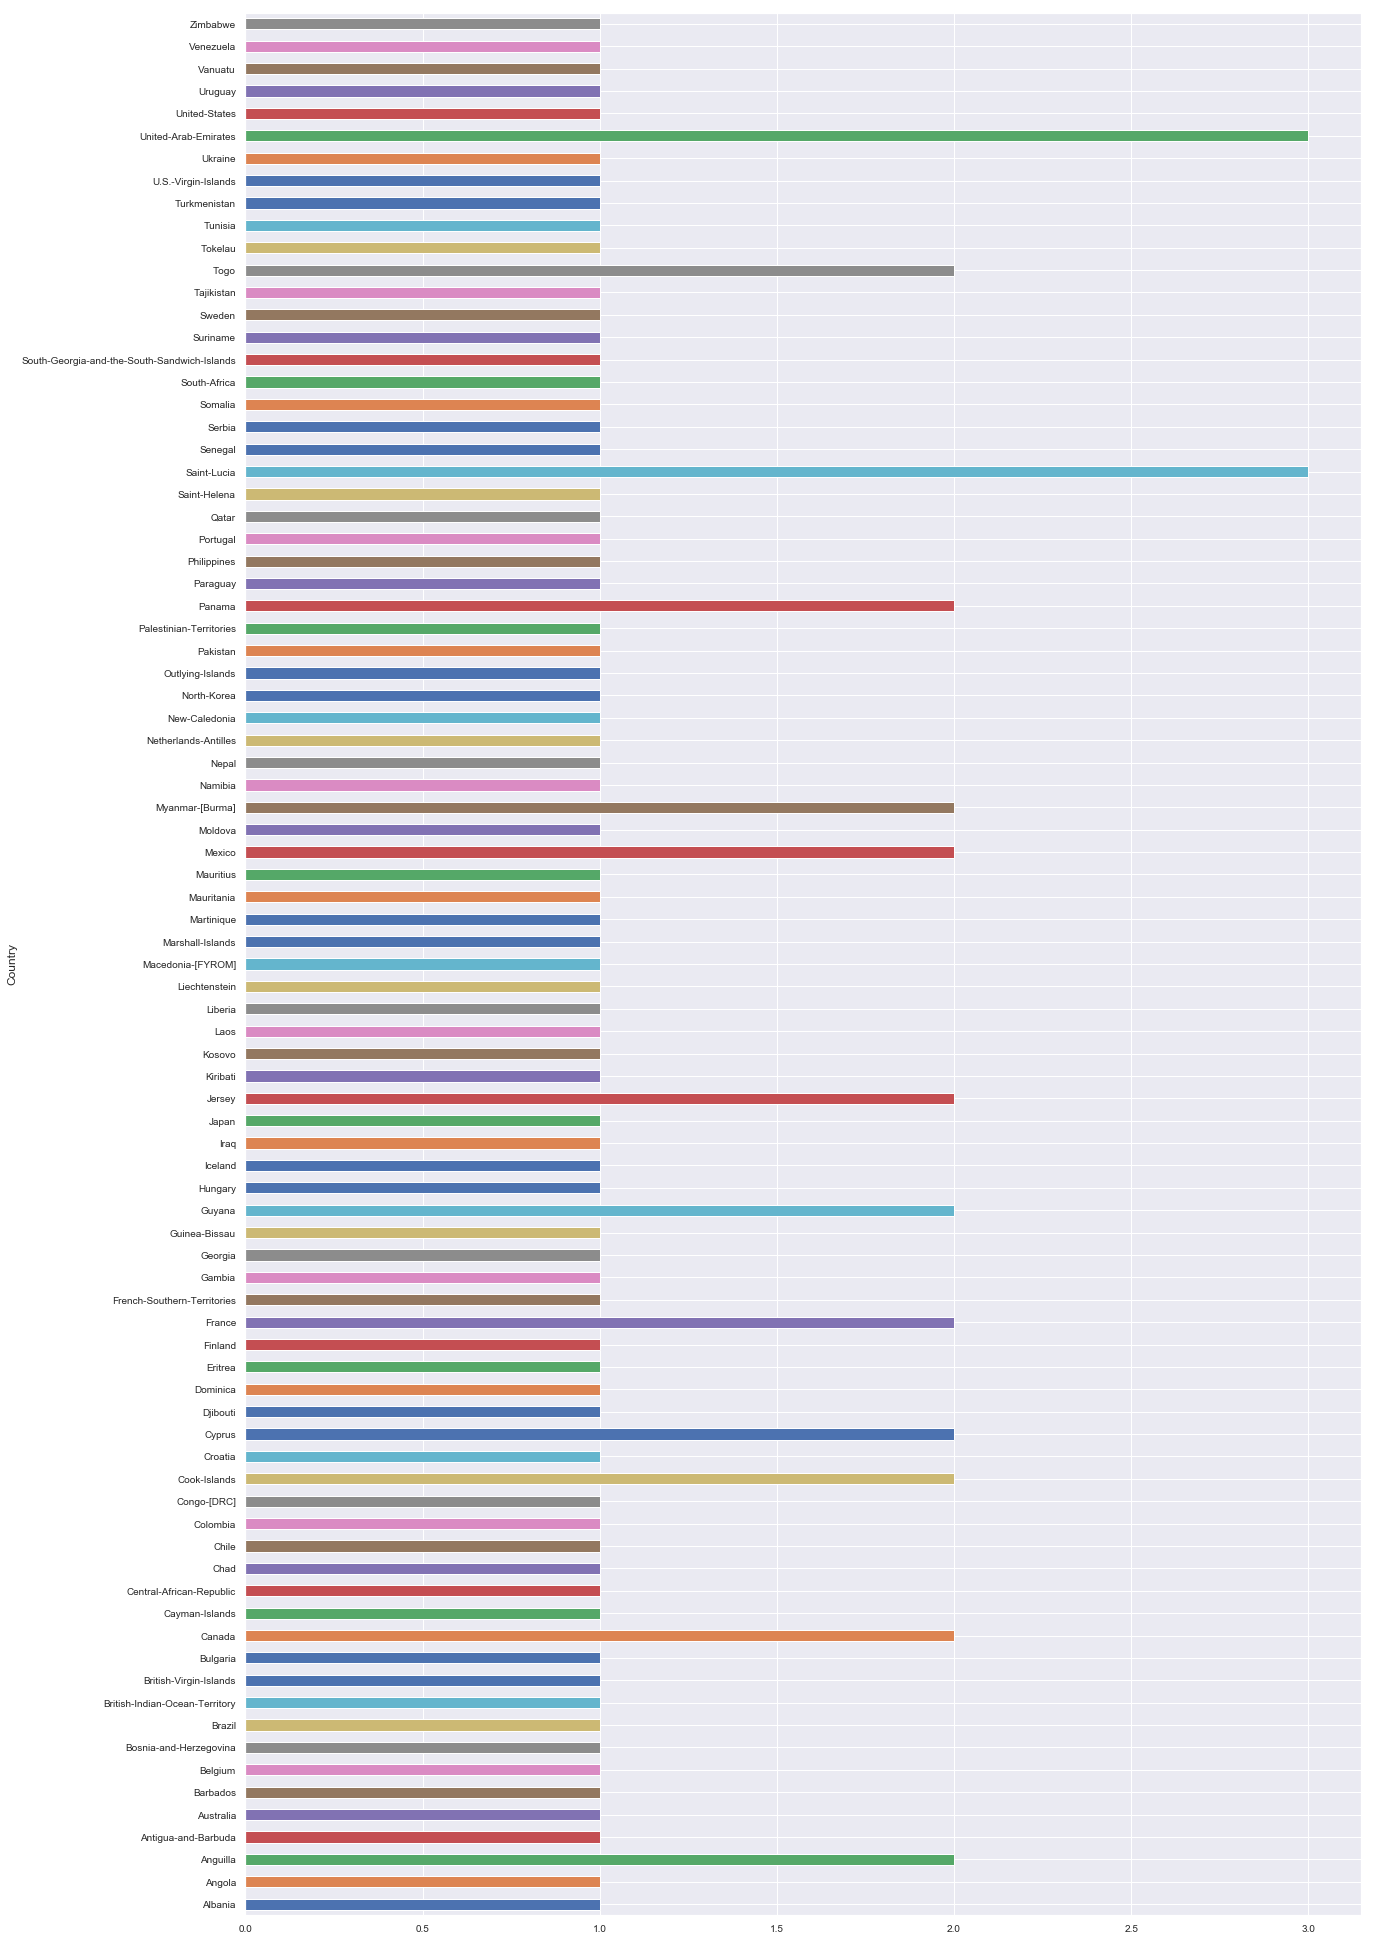

In [115]:
DF.groupby('Country').count()['ID'].plot.barh(figsize=(20, 35),fontsize =10)

--------

### Assignment:

1. Create a complete address generator in Nepal
2. Create a complete profession generator
3. Create a Class to integrate all data and function to generate a complet set of data

------

### Next New

1. Plotting Geolocation